### The Three types of missing data

1.) MCAR - missing completely at random
Example - I am a graduate student working in a lab.  I accidently knock over some test tubes because i'm very tired.  The three samples I knock off the desk are lost

This is missing completely at random - there is not a systematic difference between any missing data and non-missing data- it's just an accident 

2.) MAR - missing at random - I administer a question about income.  Female respondents may be less likely to respond to this question about income.  There will still not be a systematic difference between respondents and nonrespondents(missing and nonmissing)- there is more missing data for females, but this is because of sex, not income

3.) MNAR- missing not at random - say in the above example about income, we notice a systematic pattern to the missing data.  We can imagine that those with very low income may be hesitant to report it.  In this case, whether or not an observation is missing depends on the value of the unobserved data itself.   

### Solutions

1.) We can use only **complete cases** 

2.) we can **impute** the data

2.) we can **impute** the data

3.) Regression & Stochastic regression imputation

4.) Little's test for MCAR i.e hypothesis test on the data where - H0:MCAR & H1:MAR (this doesn't account for MNAR)

In the end, it all depends on what your client wants

https://www.kaggle.com/unsdsn/world-happiness

### Handling categorical data

In MANY cases, our data will not simply be numerical inputs, but some kind of **categorical** data(meaning anything that is not a number, or something that takes on a set amount of discrete numerical values).  For example in the infamous titanic dataset, several of the most important features(or variables) are not numerical

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./titanic.csv')

In [3]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


/Users/richardmason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


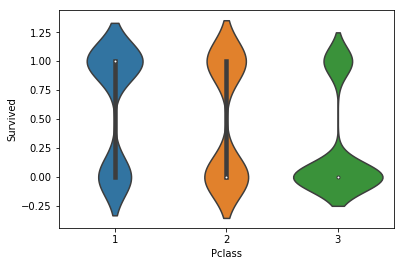

In [8]:
sns.violinplot('Pclass', 'Survived', data= titanic)

Categorical variables in their raw form can't be fed into a mathematical equation, like linear regression for instance.  Most of the time, we will use the **Dummy Variable** approach to dealing with categorical variables

Taking the titanic dataset as an example, we can create two new columns, one called "Sex_M" and one "Sex_F" like so:

In [12]:
titanic['Sex_M'] = titanic['Sex'].map({'female':0, 'male':1})
titanic['Sex_F'] = titanic['Sex'].map({'female':1, 'male':0})

In [13]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_M  Sex_F  
0      0         A/5 21171   7.2500   NaN        S      1      0  
1      0          PC 17599  71.2833   C85        C      0      1  
2      0  STON/O2. 3101282   7.9250   NaN        S      0      1  
3      0            113803  53.1000  C123        S      0      1  
4      0            373450   8.0500   NaN        S      1      0

Now, when we do this, we run the risk of introducing multicollinearity into our model, because in creating the two new columns, we can see that one is perfectly dependent on the value of the other(if Sex_M =1, then Sex_F = 0). To avoid this "Dummy variable trap" we can drop one of these columns or drop the bias(intercept) term.  

In [14]:
# pandas has a convenient function for us which will turn categorical columns into dummys for us, pd.get_dummies()
pd.get_dummies(titanic)

PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Sex_M  \
0              1         0       3  22.0      1      0    7.2500      1   
1              2         1       1  38.0      1      0   71.2833      0   
2              3         1       3  26.0      0      0    7.9250      0   
3              4         1       1  35.0      1      0   53.1000      0   
4              5         0       3  35.0      0      0    8.0500      1   
5              6         0       3   NaN      0      0    8.4583      1   
6              7         0       1  54.0      0      0   51.8625      1   
7              8         0       3   2.0      3      1   21.0750      1   
8              9         1       3  27.0      0      2   11.1333      0   
9             10         1       2  14.0      1      0   30.0708      0   
10            11         1       3   4.0      1      1   16.7000      0   
11            12         1       1  58.0      0      0   26.5500      0   
12            13         0       3  20.0      0      0    8.0500      1   
13            14         0       3  39.0      1      5   31.2750      1   
14            15         0       3  14.0      0      0    7.8542      0   
15            16         1       2  55.0      0      0   16.0000      0   
16            17         0       3   2.0      4      1   29.1250      1   
17            18         1       2   NaN      0      0   13.0000      1   
18            19         0       3  31.0      1      0   18.0000      0   
19            20         1       3   NaN      0      0    7.2250      0   
20            21         0       2  35.0      0      0   26.0000      1   
21            22         1       2  34.0      0      0   13.0000      1   
22            23         1       3  15.0      0      0    8.0292      0   
23            24         1       1  28.0      0      0   35.5000      1   
24            25         0       3   8.0      3      1   21.0750      0   
25            26         1       3  38.0      1      5   31.3875      0   
26            27         0       3   NaN      0      0    7.2250      1   
27            28         0       1  19.0      3      2  263.0000      1   
28            29         1       3   NaN      0      0    7.8792      0   
29            30         0       3   NaN      0      0    7.8958      1   
..           ...       ...     ...   ...    ...    ...       ...    ...   
861          862         0       2  21.0      1      0   11.5000      1   
862          863         1       1  48.0      0      0   25.9292      0   
863          864         0       3   NaN      8      2   69.5500      0   
864          865         0       2  24.0      0      0   13.0000      1   
865          866         1       2  42.0      0      0   13.0000      0   
866          867         1       2  27.0      1      0   13.8583      0   
867          868         0       1  31.0      0      0   50.4958      1   
868          869         0       3   NaN      0      0    9.5000      1   
869          870         1       3   4.0      1      1   11.1333      1   
870          871         0       3  26.0      0      0    7.8958      1   
871          872         1       1  47.0      1      1   52.5542      0   
872          873         0       1  33.0      0      0    5.0000      1   
873          874         0       3  47.0      0      0    9.0000      1   
874          875         1       2  28.0      1      0   24.0000      0   
875          876         1       3  15.0      0      0    7.2250      0   
876          877         0       3  20.0      0      0    9.8458      1   
877          878         0       3  19.0      0      0    7.8958      1   
878          879         0       3   NaN      0      0    7.8958      1   
879          880         1       1  56.0      0      1   83.1583      0   
880          881         1       2  25.0      0      1   26.0000      0   
881          882         0       3  33.0      0      0    7.8958      1   
882          883         0    

As you can see, often a categorical column will have so many values that it makes keeping track of all the variables in your data extremely difficult and tedious.  And it's extremely likely that these values won't add any power to the model, as is the case with the "Cabin" and "Name" columns above.  You should deal with these issues before using pd.get_dummies()

We can seek to use some logic to **combine levels** of these categorical variables, or make new features out of the levels.  

### Comparison between different types of statistical tests

#### T-test

A t-test tests the **Null hypothesis** that there is **no difference** between the levels of a two-level categorical variable(for example Labour and Tory party) and the **mean** of a quantitative variable(like age).  So in this example a t-test would test if there is a statistically significance in age between members of the Labour and Tory parties.  

#### Chi-Squared test
In order to test if two categorical variables are related, we can use the **Chi-Squared test**

$$\chi^2 = \frac{1}{d}\sum\limits_{k=1}^{N}\frac{(O_k - E_k)^2}{E_k}$$

Where $O_k$ is is the frequency **observed values** and $E_k$ is the frequency of the **expected values** and d is the **degress of freedom**- or the number of values that were used to calculate the statistic - 1

#### F-test

We can use the F-test to test the performance of regression models relative to each other.  Using this test will tell us if one model is significantly better than the other

The F-test formula: $$F = \frac{\frac{RSS_1 - RSS_2}{p_2 - p_1}}{\frac{RSS_2}{n-p_2}}$$

where $n$ is the number of data points, and $p_2$ and $p_1$ are the number of features in model 2 and model 1, respectively

If the F value is above a certain threshold, then we can reject the null-hypothesis that the models perform approximately the same, and conclude that model 2 is better